In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import statsmodels.api as smf
import calendar

import warnings
warnings.filterwarnings('ignore')

C:\Users\pv437\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Importing Dataset
airline = pd.read_excel(r'C:\Users\pv437\Desktop\Data Scince Folder\assignment\assignment downloads\ass 18/Airlines+Data.xlsx')
print('Shape of the data',airline.shape)
airline.head(10)

Shape of the data (96, 2)


,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [3]:
airline.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [4]:
airline.info

<bound method DataFrame.info of         Month  Passengers
0  1995-01-01         112
1  1995-02-01         118
2  1995-03-01         132
3  1995-04-01         129
4  1995-05-01         121
..        ...         ...
91 2002-08-01         405
92 2002-09-01         355
93 2002-10-01         306
94 2002-11-01         271
95 2002-12-01         306

[96 rows x 2 columns]>

In [5]:
airline.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
airline.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [8]:
airline['Month'] = pd.to_datetime(airline['Month'])
airline['Months'] = airline['Month'].dt.strftime('%b')
airline.head()

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


<AxesSubplot:>

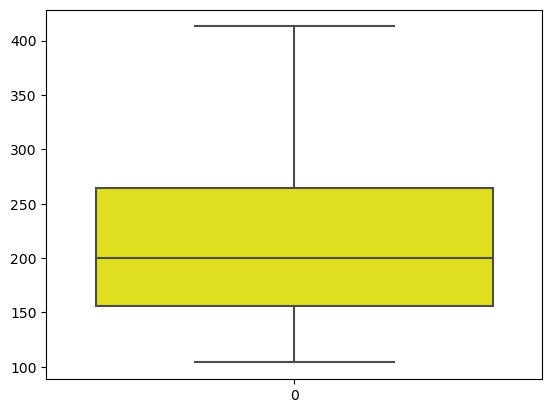

In [9]:
sns.boxplot(data=airline['Passengers'],color='yellow')

<AxesSubplot:xlabel='Month', ylabel='Passengers'>

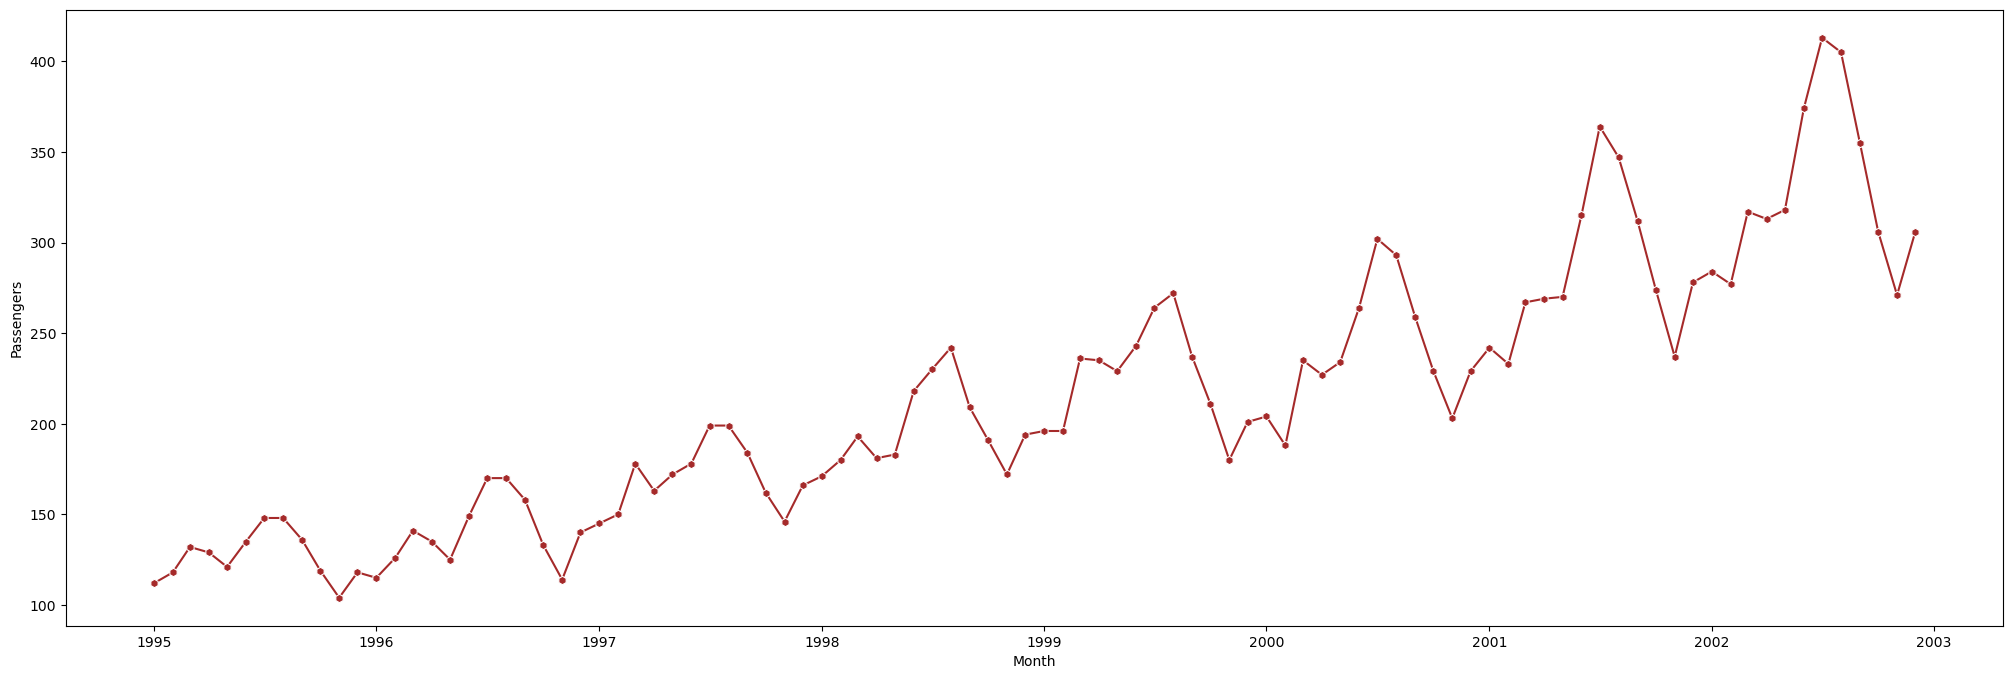

In [10]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.lineplot(x = "Month",y = "Passengers", data = airline, color = "brown", marker = "h")

In [11]:
dates = pd.date_range(start='1995-01-01', freq='MS',periods=len(airline))
dates

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [12]:
airline['Month'] = dates.month
airline['Year'] = dates.year

In [13]:
airline['Month']

0      1
1      2
2      3
3      4
4      5
      ..
91     8
92     9
93    10
94    11
95    12
Name: Month, Length: 96, dtype: int64

In [14]:
airline['Year']

0     1995
1     1995
2     1995
3     1995
4     1995
      ... 
91    2002
92    2002
93    2002
94    2002
95    2002
Name: Year, Length: 96, dtype: int64

In [15]:
airline

,Month,Passengers,Months,Year
0,1,112,Jan,1995
1,2,118,Feb,1995
2,3,132,Mar,1995
3,4,129,Apr,1995
4,5,121,May,1995
...,...,...,...,...
91,8,405,Aug,2002
92,9,355,Sep,2002
93,10,306,Oct,2002
94,11,271,Nov,2002


In [16]:
airline['Month'] = airline['Month'].apply(lambda x: calendar.month_abbr[x])
airline.rename({'#Passengers':'Passengers'},axis=1,inplace=True)
airline = airline[['Month','Year','Passengers']]

In [17]:
airline

,Month,Year,Passengers
0,Jan,1995,112
1,Feb,1995,118
2,Mar,1995,132
3,Apr,1995,129
4,May,1995,121
...,...,...,...
91,Aug,2002,405
92,Sep,2002,355
93,Oct,2002,306
94,Nov,2002,271


In [18]:
airline['Date'] = dates
airline.set_index('Date',inplace=True)

In [19]:
airline

,Month,Year,Passengers
Date,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121
...,...,...,...
2002-08-01,Aug,2002,405
2002-09-01,Sep,2002,355
2002-10-01,Oct,2002,306


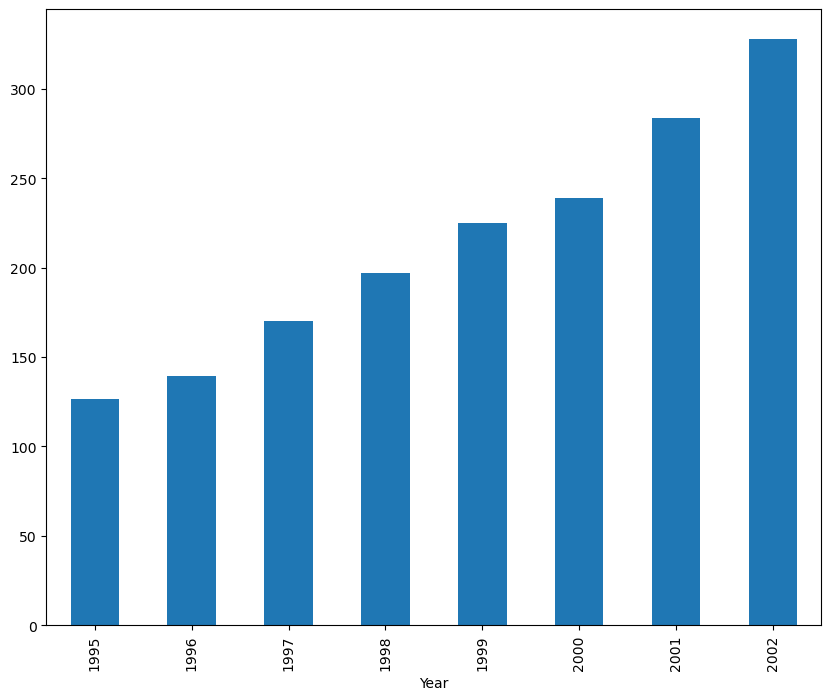

In [20]:
plt.figure(figsize=(10,8))
airline.groupby('Year')['Passengers'].mean().plot(kind='bar')
plt.show()


In [21]:
print('From the figure we can see that passengers are increasing with the increase in the year')

From the figure we can see that passengers are increasing with the increase in the year


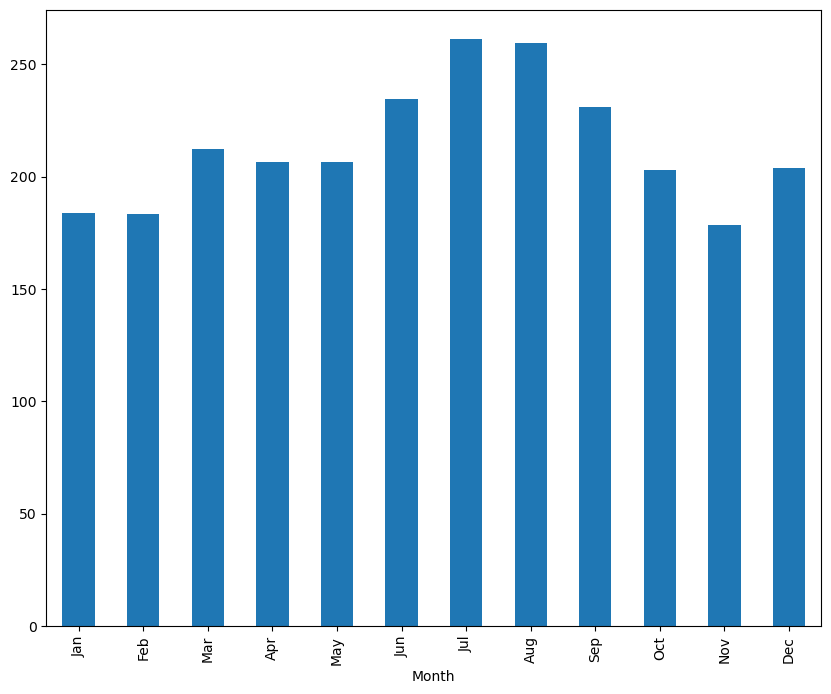

In [22]:
plt.figure(figsize=(10,8))
airline.groupby('Month')['Passengers'].mean().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.show()

In [23]:
print('From the figure we can see that more passengers are traveling between months June to September.')

From the figure we can see that more passengers are traveling between months June to September.


In [24]:
passengers_count = airline['Passengers']
passengers_count

Date
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

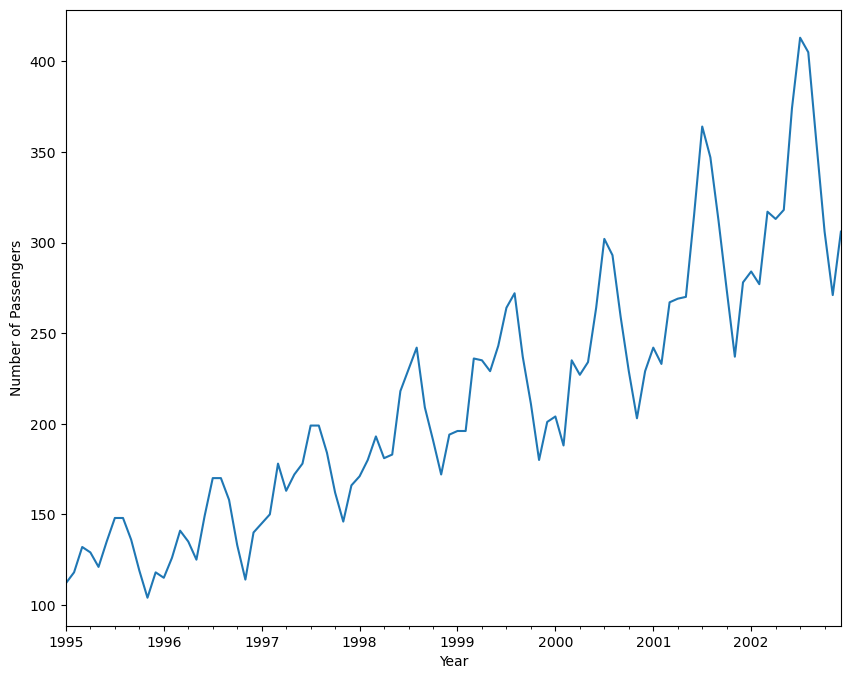

In [25]:
plt.figure(figsize=(10,8))
passengers_count.plot()
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

In [26]:
monthly = pd.pivot_table(data=airline,values='Passengers',index='Month',columns='Year')
monthly = monthly.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
monthly

Year,1995,1996,1997,1998,1999,2000,2001,2002
Month,,,,,,,,
Jan,112,115,145,171,196,204,242,284
Feb,118,126,150,180,196,188,233,277
Mar,132,141,178,193,236,235,267,317
Apr,129,135,163,181,235,227,269,313
May,121,125,172,183,229,234,270,318
Jun,135,149,178,218,243,264,315,374
Jul,148,170,199,230,264,302,364,413
Aug,148,170,199,242,272,293,347,405
Sep,136,158,184,209,237,259,312,355


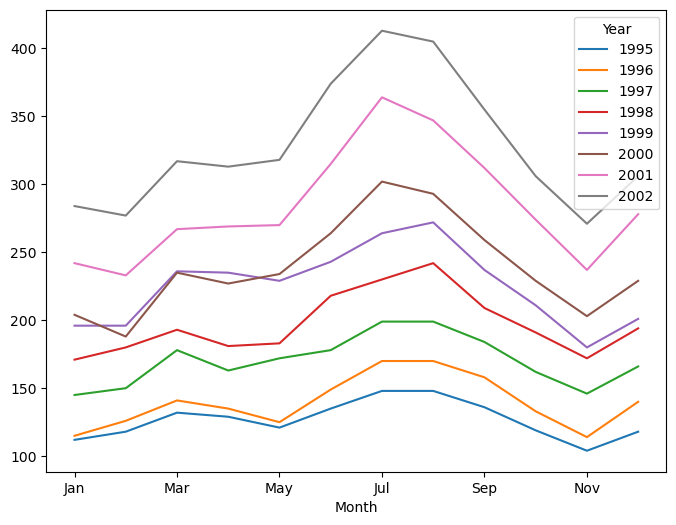

In [27]:
monthly.plot(figsize=(8,6))
plt.show()

In [28]:
yearly = pd.pivot_table(data=airline,values='Passengers',index='Year',columns='Month')
yearly = yearly[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
yearly

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1995,112,118,132,129,121,135,148,148,136,119,104,118
1996,115,126,141,135,125,149,170,170,158,133,114,140
1997,145,150,178,163,172,178,199,199,184,162,146,166
1998,171,180,193,181,183,218,230,242,209,191,172,194
1999,196,196,236,235,229,243,264,272,237,211,180,201
2000,204,188,235,227,234,264,302,293,259,229,203,229
2001,242,233,267,269,270,315,364,347,312,274,237,278
2002,284,277,317,313,318,374,413,405,355,306,271,306


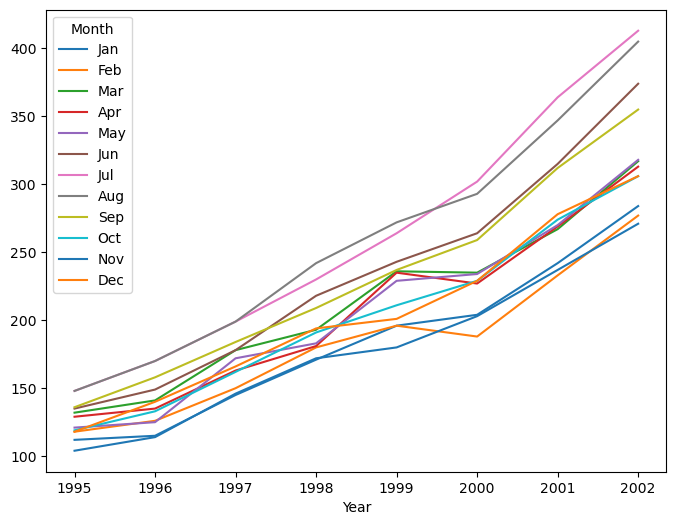

In [29]:
yearly.plot(figsize=(8,6))
plt.show()

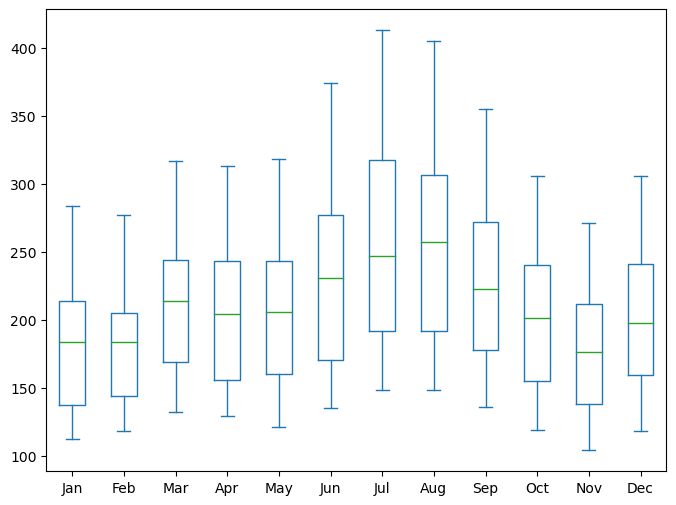

In [30]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

In [31]:
airline

,Month,Year,Passengers
Date,,,
1995-01-01,Jan,1995,112
1995-02-01,Feb,1995,118
1995-03-01,Mar,1995,132
1995-04-01,Apr,1995,129
1995-05-01,May,1995,121
...,...,...,...
2002-08-01,Aug,2002,405
2002-09-01,Sep,2002,355
2002-10-01,Oct,2002,306


In [32]:
month_dummies = pd.DataFrame(pd.get_dummies(airline['Month']))
airline1 = pd.concat([airline,month_dummies],axis = 1)
airline1.head()

,Month,Year,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,,
1995-01-01,Jan,1995,112,0,0,0,0,1,0,0,0,0,0,0,0
1995-02-01,Feb,1995,118,0,0,0,1,0,0,0,0,0,0,0,0
1995-03-01,Mar,1995,132,0,0,0,0,0,0,0,1,0,0,0,0
1995-04-01,Apr,1995,129,1,0,0,0,0,0,0,0,0,0,0,0
1995-05-01,May,1995,121,0,0,0,0,0,0,0,0,1,0,0,0


In [33]:
airline1.head(12)

,Month,Year,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,,
1995-01-01,Jan,1995,112,0,0,0,0,1,0,0,0,0,0,0,0
1995-02-01,Feb,1995,118,0,0,0,1,0,0,0,0,0,0,0,0
1995-03-01,Mar,1995,132,0,0,0,0,0,0,0,1,0,0,0,0
1995-04-01,Apr,1995,129,1,0,0,0,0,0,0,0,0,0,0,0
1995-05-01,May,1995,121,0,0,0,0,0,0,0,0,1,0,0,0
1995-06-01,Jun,1995,135,0,0,0,0,0,0,1,0,0,0,0,0
1995-07-01,Jul,1995,148,0,0,0,0,0,1,0,0,0,0,0,0
1995-08-01,Aug,1995,148,0,1,0,0,0,0,0,0,0,0,0,0
1995-09-01,Sep,1995,136,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
airline1["t"] = np.arange(1,97)
airline1["t_squared"] = airline1["t"]*airline1["t"]
airline1["log_Passengers"] = np.log(airline1["Passengers"])
airline1.columns
airline1.head(12)

,Month,Year,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Passengers
Date,,,,,,,,,,,,,,,,,,
1995-01-01,Jan,1995,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1995-02-01,Feb,1995,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
1995-03-01,Mar,1995,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
1995-04-01,Apr,1995,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
1995-05-01,May,1995,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
1995-06-01,Jun,1995,135,0,0,0,0,0,0,1,0,0,0,0,0,6,36,4.905275
1995-07-01,Jul,1995,148,0,0,0,0,0,1,0,0,0,0,0,0,7,49,4.997212
1995-08-01,Aug,1995,148,0,1,0,0,0,0,0,0,0,0,0,0,8,64,4.997212
1995-09-01,Sep,1995,136,0,0,0,0,0,0,0,0,0,0,0,1,9,81,4.912655


In [35]:
Train = airline1.head(75)
Test = airline1.tail(25)

In [36]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
print("RMSE Linear: ",rmse_linear)

RMSE Linear:  51.83809749584509


In [37]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential: ",rmse_Exp)

RMSE Exponential:  42.77525975019796


In [38]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
print("RMSE Quadratic: ",rmse_Quad)

RMSE Quadratic:  54.031406456252654


In [39]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)

RMSE Additive seasonality:  123.02763788084238


In [40]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 36.5362744454732


In [41]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_Mult_sea)

RMSE Multiplicative Seasonality: 128.16622817596155


In [42]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 11.565825437686447


In [43]:
data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data1)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,51.838097
1,rmse_Exp,42.775260
2,rmse_Quad,54.031406
3,rmse_add_sea,123.027638
4,rmse_add_sea_quad,36.536274
5,rmse_Mult_sea,128.166228
6,rmse_Mult_add_sea,11.565825


In [44]:
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [45]:
# Create dummies and T and T-Squared columns

dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,13)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  t  t_squared  
0    0  1          1  
1    0  2          4  
2    0  3          9  
3    0  4         16  
4    0  5         25  


In [46]:
# Forecasting using Multiplicative Additive Seasonality Model

model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =airline1).fit()
pred_new  = pd.Series(model_full.predict(forecast1))

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

In [47]:
# Final Prediction for next 12 months

Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']] 
Final_predict

,Date,Forecasted_Passengers
0,2003-01-01,109.176148
1,2003-02-01,110.331245
2,2003-03-01,127.315234
3,2003-04-01,123.200587
4,2003-5-01,122.399578
5,2003-06-01,138.536397
6,2003-07-01,154.066959
7,2003-08-01,153.741209
8,2003-09-01,137.693733
9,2003-10-01,120.894736
